In [5]:
### pip install pystan
### conda install -c conda-forge fbprophet

import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df=pd.read_csv("C:\\Users\\dell\\Datasets\\case_time_series_1.csv")

In [56]:
df.head(10)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-01-2020,1,1,0,0,0,0
1,31-01-2020,0,1,0,0,0,0
2,01-02-2020,0,1,0,0,0,0
3,02-02-2020,1,2,0,0,0,0
4,03-02-2020,1,3,0,0,0,0
5,04-02-2020,0,3,0,0,0,0
6,05-02-2020,0,3,0,0,0,0
7,06-02-2020,0,3,0,0,0,0
8,07-02-2020,0,3,0,0,0,0
9,08-02-2020,0,3,0,0,0,0


In [57]:
df.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
88,27-04-2020,1568,29458,580,7103,58,939
89,28-04-2020,1902,31360,636,7739,69,1008
90,29-04-2020,1705,33065,690,8429,71,1079
91,30-04-2020,1801,34866,630,9059,75,1154
92,01-05-2020,2391,37257,962,10021,69,1223


In [58]:
df.drop(['Total Deceased','Total Confirmed','Total Recovered'],axis=1,inplace=True)

In [59]:
df.head()

,Date,Daily Confirmed,Daily Recovered,Daily Deceased
0,30-01-2020,1,0,0
1,31-01-2020,0,0,0
2,01-02-2020,0,0,0
3,02-02-2020,1,0,0
4,03-02-2020,1,0,0


In [60]:
df.drop(['Daily Deceased','Daily Recovered'],axis=1,inplace=True)

In [61]:
df.head()

,Date,Daily Confirmed
0,30-01-2020,1
1,31-01-2020,0
2,01-02-2020,0
3,02-02-2020,1
4,03-02-2020,1


In [62]:
df.columns = ['ds','y']
df.head()

,ds,y
0,30-01-2020,1
1,31-01-2020,0
2,01-02-2020,0
3,02-02-2020,1
4,03-02-2020,1


In [63]:
df.tail()

,ds,y
88,27-04-2020,1568
89,28-04-2020,1902
90,29-04-2020,1705
91,30-04-2020,1801
92,01-05-2020,2391


In [64]:
df.dropna(axis=0,inplace=True)

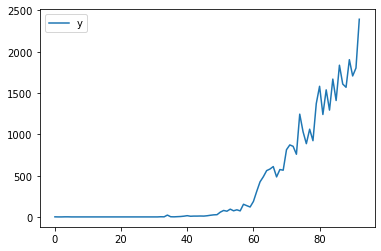

In [65]:
df.plot()

In [66]:
from fbprophet import Prophet

In [67]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [68]:
#Initialize the Model
model = Prophet()

In [69]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [71]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [72]:
future_dates.tail()

,ds
453,2021-11-30
454,2021-12-01
455,2021-12-02
456,2021-12-03
457,2021-12-04


In [73]:
prediction=model.predict(future_dates)

In [74]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,359.506462,-519.137093,1095.287573,359.506462,359.506462,-64.422635,-64.422635,-64.422635,-64.422635,-64.422635,-64.422635,0.0,0.0,0.0,295.083826
1,2020-01-03,359.921618,-557.327591,977.034652,359.921618,359.921618,-132.694379,-132.694379,-132.694379,-132.694379,-132.694379,-132.694379,0.0,0.0,0.0,227.227239
2,2020-01-04,360.336774,-473.503988,1081.404975,360.336774,360.336774,-14.545235,-14.545235,-14.545235,-14.545235,-14.545235,-14.545235,0.0,0.0,0.0,345.791539
3,2020-01-05,360.751931,-237.663654,1313.262219,360.751931,360.751931,152.807994,152.807994,152.807994,152.807994,152.807994,152.807994,0.0,0.0,0.0,513.559924
4,2020-01-30,371.130838,-467.523945,1058.956811,371.130838,371.130838,-64.422635,-64.422635,-64.422635,-64.422635,-64.422635,-64.422635,0.0,0.0,0.0,306.708202


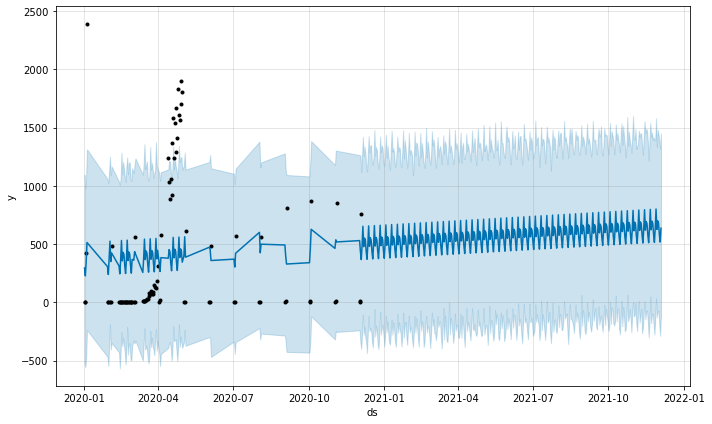

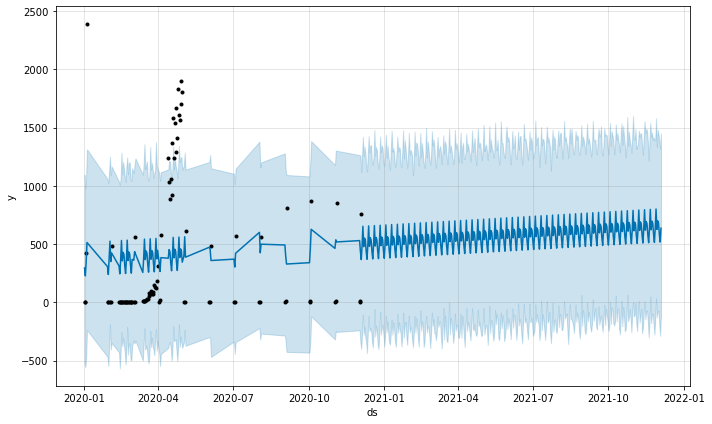

In [75]:
### plot the predicted projection
model.plot(prediction)

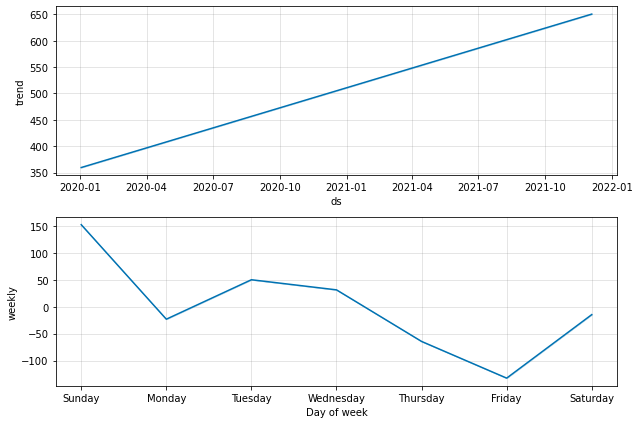

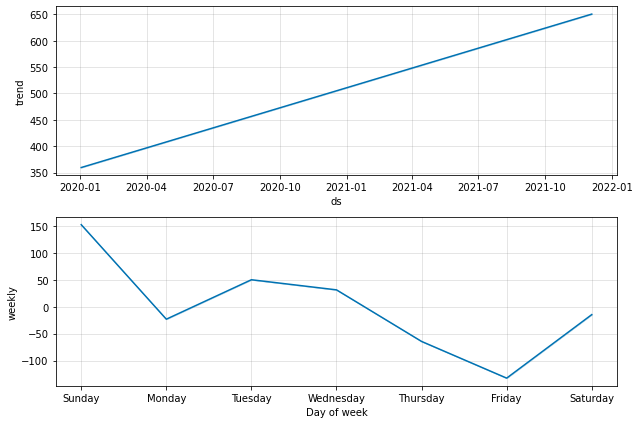

In [76]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [119]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='100 days', period='100 days', horizon = '210 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-05-08 00:00:00 and 2020-05-08 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-02,1313.944531,584.217441,2027.524705,0,2020-05-08
1,2020-06-03,1305.328834,585.557684,2014.460098,1,2020-05-08
2,2020-06-04,1299.982698,582.172004,2019.460579,484,2020-05-08
3,2020-07-02,1591.004619,922.503636,2309.028011,0,2020-05-08
4,2020-07-03,1450.391168,728.763523,2133.796216,3,2020-05-08


In [120]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,26 days,1.713862e+06,1309.145511,1309.136682,inf,0.0
1,27 days,1.183551e+06,1087.911180,1060.155766,653.007374,0.0
2,55 days,1.598562e+06,1264.342410,1203.493659,inf,0.0
3,56 days,2.313118e+06,1520.893962,1519.197893,inf,0.0
4,57 days,1.508776e+06,1228.322363,1203.958652,242.070017,0.0


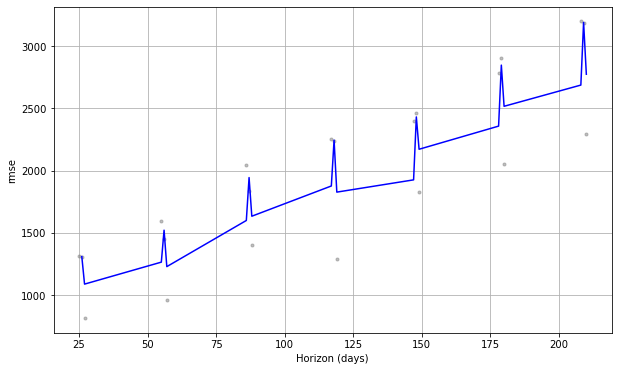

In [121]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')